In [1]:
# Import libaries and illustris library
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib import gridspec
%matplotlib inline
import random
import subroutines.bins as bf
import subroutines.plot_functions as plot_functions
import subroutines.tree_functions as tf
hubble = 0.704

In [2]:
plt.style.use('default')
mpl.rcParams['lines.linewidth']=2
mpl.rcParams['font.size']=15
%reload_ext autoreload
%autoreload 2

In [4]:
#load data
snaps=[135,116,103,85]
galData = []
webData = []
for i in snaps:
    # 0:HaloNumber, 1:SubhaloNumber, 2:StellarMass, 3:GasMass, 4:DarkMatterMass, 5-7:SubhaloPosition x,y,z
    # 8-10:CoM Velocity x, CoM Velocity y, CoM Velocity z, 11-13:AngularMomentum x, AngularMomentum y, AngularMomentum z, 
    # 14:Kappa, 15:Flatness, 16:Ellip, 17:Lambda, 18:BHMass 19:BMMassDot 20:StarFormationRate (MDot) 21:N(sub_z=0) 22:N(sub_z_next) 23:N(sub_z_previous)
    galData.append(np.genfromtxt('../../Data/GalaxyData/GalaxyData_Snap.'+str(i)+'.txt'))

    # 0:HaloNumber, 1:SubhaloNumber, 2-4:SubhaloPosition x,y,z, 5: Index of nearest critical point, 6: absolute distance to crit., 7-9: nearest critical point coordinates, 
    # 10: Index of nearest filament, 11:absolute distance to filament, 12-14: nearest filament coordinates, 15: cos(theta) 16:sin(theta) 17:cluster(1) fil(0) nothing(-1)
    # 17: cluster=1, filament=0, none=-1
    webData.append(np.genfromtxt('../../Data/WebData/galaxy_web_data.'+str(i)+'.txt'))

galData_ellip = []; galData_disk = [];
webData_ellip = []; webData_disk = [];
for i in range (0,4):
    galData_ellip.append(galData[i][maskEllips(i)])
    webData_ellip.append(webData[i][maskEllips(i)])
    galData_disk.append(galData[i][~maskEllips(i)])
    webData_disk.append(webData[i][~maskEllips(i)])
#load all galaxy data
allgalData = []
for i in range (135,84,-1):
    # 0:HaloNumber, 1:SubhaloNumber, 2:StellarMass, 3:GasMass, 4:DarkMatterMass, 5-7:SubhaloPosition x,y,z
    # 8-10:CoM Velocity x, CoM Velocity y, CoM Velocity z, 11-13:AngularMomentum x, AngularMomentum y, AngularMomentum z, 
    # 14:Kappa, 15:Flatness, 16:Ellip, 17:Lambda, 18:BHMass 19:BMMassDot 20:StarFormationRate (MDot) 21:N(sub_z=0) 22:N(sub_z_next) 23:N(sub_z_previous)
    allgalData.append(np.genfromtxt('../../Data/GalaxyData/GalaxyData_Snap.'+str(i)+'.txt'))

allgalData_ellip = []; allgalData_disk = [];
for i in range(0,51):
    allgalData_ellip.append(allgalData[i][allgalData[i][:,14]<0.5]);
    allgalData_disk.append(allgalData[i][allgalData[i][:,14]>0.5]);

In [3]:
def maskEllips(whichSnap):
    return (galData[whichSnap][:,14]<0.5);
def maskMass(whichSnap, mass_low, mass_high=50000):
    return ( (mass_high>galData[whichSnap][:,2]) & (galData[whichSnap][:,2]>mass_low) );
def maskMass_data(data, mass_low, mass_high=50000):
    return ( (mass_high>data) & (data>mass_low) );
def maskWeb(whichSnap, webValue):
    return (webData[whichSnap][:,17]==webValue);
def maskWeb_ellip(whichSnap, webValue):
    return (webData_ellip[whichSnap][:,17]==webValue);

In [532]:
z_map=[0,19,32,50]
bhdot_int_zn = []
stardot_int_zn = []
for i in [0,1,2,3]:
    bhdot_int_zn.append(tf.time_integration(allgalData, z_map[i],10, 19))
    stardot_int_zn.append(tf.time_integration(allgalData, z_map[i], 10, 20)) 

Integration done with 0.0 %
Integration done with 20.0 %
Integration done with 40.0 %
Integration done with 60.0 %
Integration done with 80.0 %
Integration done with 100.0 %
Integration done with 0.0 %
Integration done with 20.0 %
Integration done with 40.0 %
Integration done with 60.0 %
Integration done with 80.0 %
Integration done with 100.0 %
Integration done with 0.0 %
Integration done with 20.0 %
Integration done with 40.0 %
Integration done with 60.0 %
Integration done with 80.0 %
Integration done with 100.0 %
Integration done with 0.0 %
Integration done with 20.0 %
Integration done with 40.0 %
Integration done with 60.0 %
Integration done with 80.0 %
Integration done with 100.0 %
Integration done with 0.0 %
Integration done with 20.0 %
Integration done with 40.0 %
Integration done with 60.0 %
Integration done with 80.0 %
Integration done with 100.0 %
Integration done with 0.0 %
Integration done with 20.0 %
Integration done with 40.0 %
Integration done with 60.0 %
Integration don

In [580]:
bhdot_int_total = tf.time_integration(allgalData, 0,50, 19)
stardot_int_total = tf.time_integration(allgalData, 0,50, 20)

Integration done with 0.0 %
Integration done with 20.0 %
Integration done with 40.0 %
Integration done with 60.0 %
Integration done with 80.0 %
Integration done with 100.0 %
Integration done with 0.0 %
Integration done with 20.0 %
Integration done with 40.0 %
Integration done with 60.0 %
Integration done with 80.0 %
Integration done with 100.0 %


High Mass z= 1.0 [ 40.  34.  36.]
High Mass z= 0.5 [ 39.  35.  38.]
High Mass z= 0.0 [ 39.  35.  38.]
Int. Mass z= 1.0 [  66.   84.  110.]
Int. Mass z= 0.5 [  67.   84.  114.]
Int. Mass z= 0.0 [  67.   84.  114.]
Low Mass z= 1.0 [  69.  122.  289.   87.]
Low Mass z= 0.5 [ 111.  248.  615.  182.]
Low Mass z= 0.0 [ 131.  331.  868.  223.]


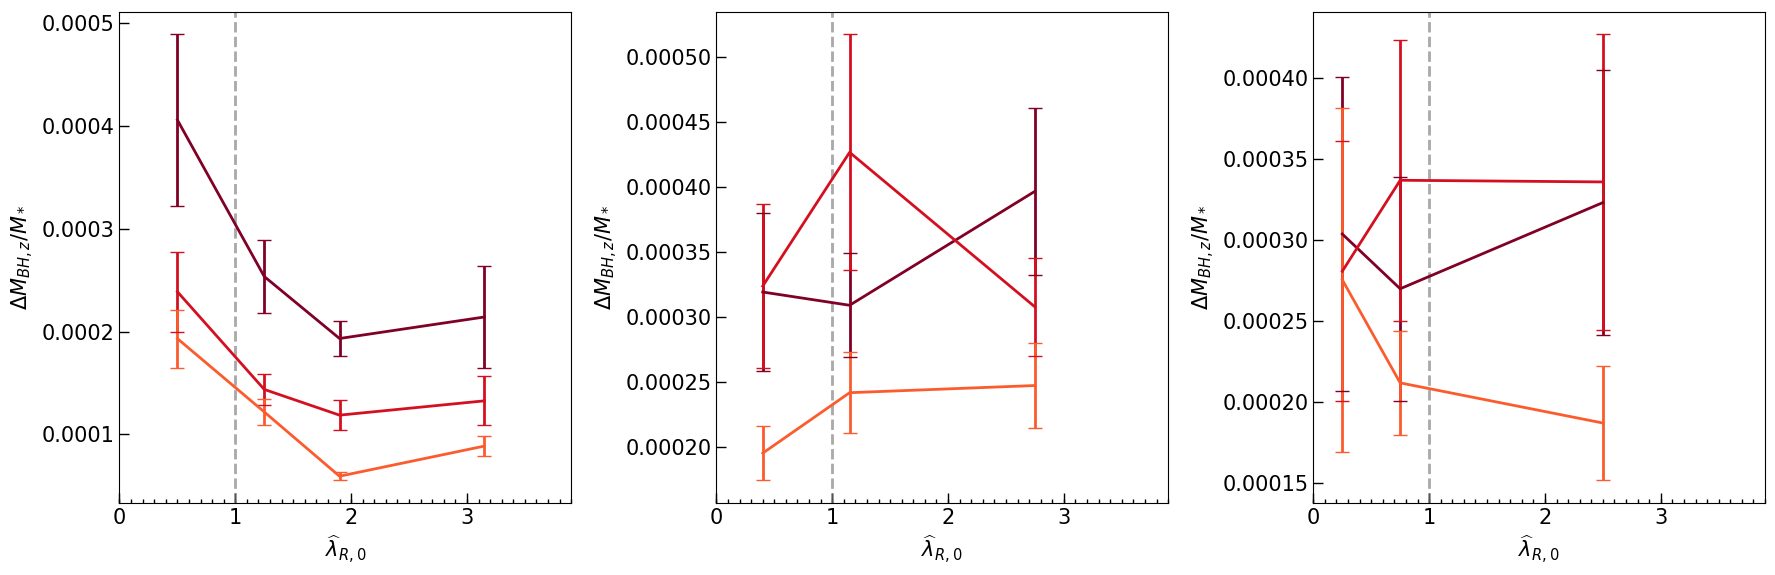

In [536]:
# lambda vs delta black hole over mass of galaxy at 0 for all redshifts
fig = plt.figure(figsize=(18, 6));gs=gridspec.GridSpec(1, 3); z_map=[0,19,32,50]; color = mpl.cm.get_cmap('YlOrRd');
mass = [0,10,32,150]; label = ['Low Mass','Int. Mass', 'High Mass'];
bins = np.array([[0,1,1.5,2.3,4],
                 [0,0.8,1.5,4],
                 [0,0.5,1,4]]); 
for j in [2,1,0]:
    ax = plt.subplot(gs[0,j], facecolor='white');
    for i in [3,2,1]:
        output = tf.web_evolution(allgalData, webData,i,0); clean_output = output[~np.isnan(output[:,2])].astype('int64');  
        # clean output of nan and then take all gals that can be traced back
        data_z0 = galData[0][clean_output[:,2]];
        data_zn = bhdot_int_zn[i][clean_output[:,3]] #stardot_int_zn[i][clean_output[:,3]]
        # take all gals that are ellipticals at z=0 and have a certain mass
        mass_mask = maskMass_data(data_z0[:,2],mass[j],mass[j+1]);
        data_zn = data_zn[(data_z0[:,14]<0.5) & mass_mask & (data_z0[:,19]!=0)]; 
        data_z0 = data_z0[(data_z0[:,14]<0.5) & mass_mask & (data_z0[:,19]!=0)];
        
        # bin all of them
        binned_data = bf.bin_data(data_z0[:,16], data_zn[:,0]/data_z0[:,2], bins[j])
        ax.errorbar(binned_data[:,6], binned_data[:,1], yerr=binned_data[:,3], fmt='-', label='Bhdot', capsize=5 , color=color(0.4+i*0.2))
        
        minor_ticks_x = np.arange(0, 4, 0.1); ax.set_xticks(minor_ticks_x, minor=True); ax.xaxis.set_tick_params(which='minor',width=1, length=3, direction='in');
        ax.xaxis.set_tick_params(width=1, length=7, direction='in'); ax.yaxis.set_tick_params(width=1, length=7, direction='in');
        ax.set_xlabel(r'$\widehat{\lambda}_{R, 0}$'); ax.set_ylabel(r'$\Delta M_{BH, z}/{M_*}$');
        ax.set_xlim([0,3.9]);
        ax.axvline(1, color='grey', alpha=0.3, linestyle='--');
        #ax.text(0.7,0.95, label[j],fontsize=15, fontweight='bold', ha='right');
        print(label[j],'z=',i/2-0.5, binned_data[:,5])

plt.tight_layout(); #plt.subplots_adjust(hspace=0, wspace=.0); 
plt.show()

High Mass z= 1.0 [ 40.  34.  36.]
High Mass z= 0.5 [ 39.  35.  37.]
High Mass z= 0.0 [ 39.  35.  37.]
High Mass z= -0.5 [ 40.  33.  34.]
Int. Mass z= 1.0 [ 66.  86.  43.  71.]
Int. Mass z= 0.5 [ 67.  85.  45.  71.]
Int. Mass z= 0.0 [ 68.  84.  43.  73.]
Int. Mass z= -0.5 [ 56.  67.  35.  59.]
Low Mass z= 1.0 [  86.  149.  229.  135.   58.]
Low Mass z= 0.5 [ 125.  267.  445.  284.  112.]
Low Mass z= 0.0 [ 145.  351.  623.  383.  132.]
Low Mass z= -0.5 [ 131.  371.  663.  394.  130.]


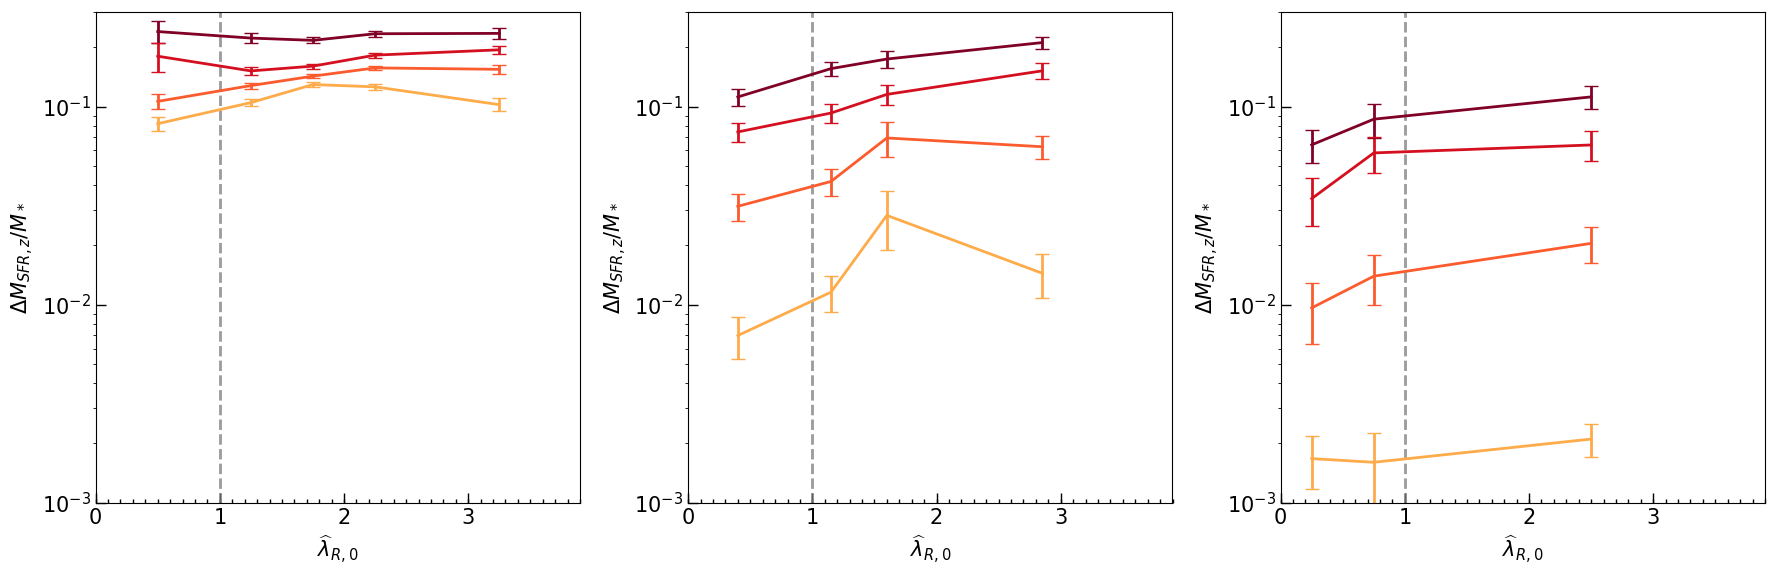

In [670]:
# lambda vs delta star formation over mass of galaxy at 0 for all redshifts
fig = plt.figure(figsize=(18, 6));gs=gridspec.GridSpec(1, 3); z_map=[0,19,32,50]; color = mpl.cm.get_cmap('YlOrRd');
mass = [0,10,32,150]; label = ['Low Mass','Int. Mass', 'High Mass']; label_ax = ['z=0', 'z=0.25', 'z=0.5', 'z=1']
bins = np.array([[0,1,1.5,2,2.5,4],
                 [0,0.8,1.5,1.7,4],
                 [0,0.5,1,4]]); 
for j in [2,1,0]:
    ax = plt.subplot(gs[0,j], facecolor='white');
    for i in [3,2,1,0]:
        output = tf.web_evolution(allgalData, webData,i,0); clean_output = output[~np.isnan(output[:,2])].astype('int64');  
        # clean output of nan and then take all gals that can be traced back
        data_z0 = galData[0][clean_output[:,2]];
        data_zn = stardot_int_zn[i][clean_output[:,3]]
        # take all gals that are ellipticals at z=0 and have a certain mass
        mass_mask = maskMass_data(data_z0[:,2],mass[j],mass[j+1]);
        star_mask = (data_zn[:,0]!=0)
        data_zn = data_zn[(data_z0[:,14]<0.5) & mass_mask & star_mask]; 
        data_z0 = data_z0[(data_z0[:,14]<0.5) & mass_mask & star_mask];
        
        # bin all of them
        binned_data = bf.bin_data(data_z0[:,16], (data_zn[:,0]/data_z0[:,2]), bins[j])
        ax.errorbar(binned_data[:,6], binned_data[:,1], yerr=binned_data[:,3], fmt='-', label=label_ax[i], capsize=5 , color=color(0.4+i*0.2))
        
        minor_ticks_x = np.arange(0, 4, 0.1); ax.set_xticks(minor_ticks_x, minor=True); ax.xaxis.set_tick_params(which='minor',width=1, length=3, direction='in');
        ax.xaxis.set_tick_params(width=1, length=7, direction='in'); ax.yaxis.set_tick_params(width=1, length=7, direction='in');
        ax.set_xlabel(r'$\widehat{\lambda}_{R, 0}$'); ax.set_ylabel(r'$\Delta M_{SFR, z}/{M_*}$');
        ax.set_xlim([0,3.9]); ax.set_ylim([0.001,0.3])
        ax.set_yscale('log')
        ax.axvline(1, color='grey', alpha=0.3, linestyle='--');
        #ax.text(3.8,0.3, label[j],fontsize=15, fontweight='bold', ha='right');
        #handles, labels = ax.get_legend_handles_labels(); handles = [h[0] for h in handles];ax.legend(handles,labels,loc="best");
        print(label[j],'z=',i/2-0.5, binned_data[:,5])
        

plt.tight_layout(); 
plt.show()

Low Mass [  89.  444.  694.  400.  132.]
Int. Mass [ 66.  76.  65.  38.]
High Mass [ 41.  35.  37.]


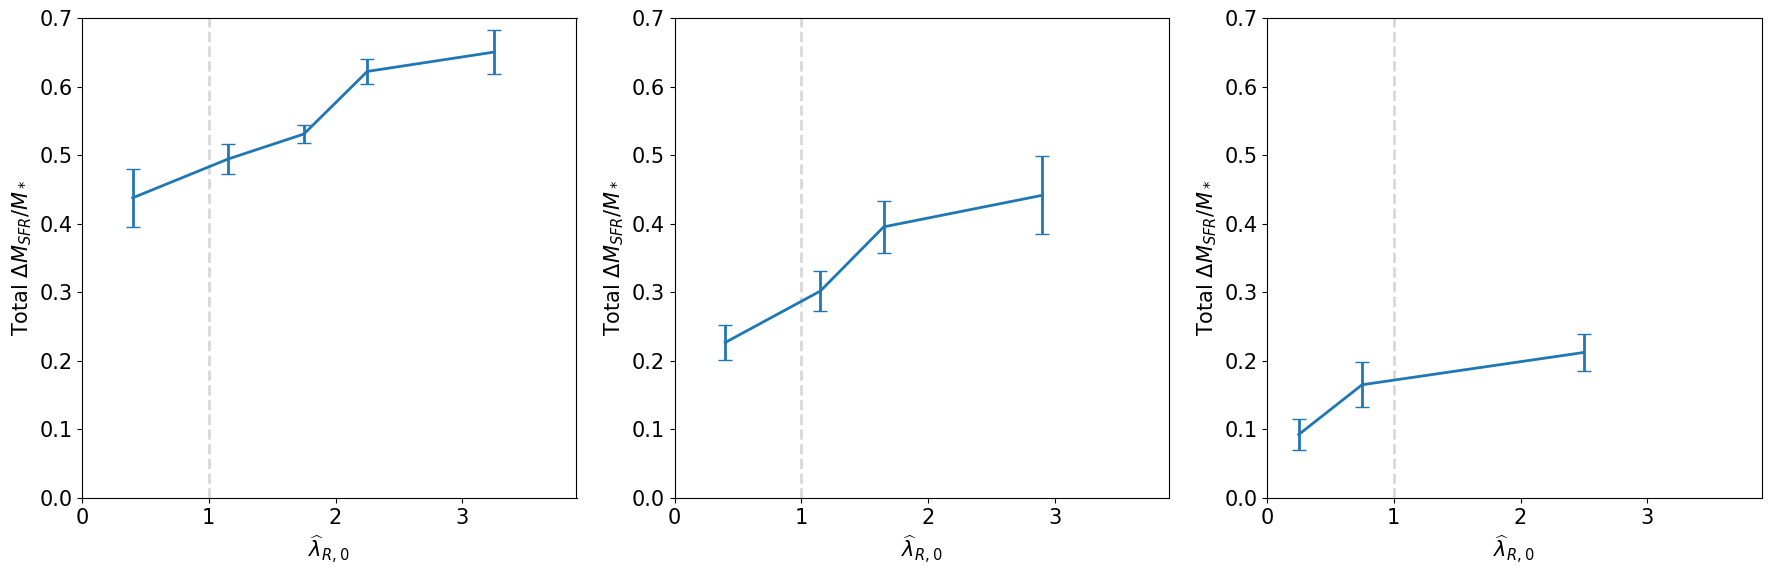

In [671]:
# fraction of ellipcials in filaments (blue) and clusters (red) at z=0 compared to sfr over all time
fig = plt.figure(figsize=(18, 6));gs=gridspec.GridSpec(1, 3);
mass = [0,10,32,150]; label = ['Low Mass','Int. Mass', 'High Mass'];
bins = np.array([[0,0.8,1.5,2,2.5,4],
                 [0,0.8,1.5,1.8,4],
                 [0,0.5,1,4]]);

for j in [0,1,2]:
    ax = plt.subplot(gs[0,j], facecolor='white');
    data_z0 = allgalData[0];
    data_zn = stardot_int_total
    # take all gals that are ellipticals at z=0 and have a certain mass
    mass_mask = maskMass_data(data_z0[:,2],mass[j],mass[j+1]);
    star_mask = (data_zn[:,0]!=0)
    data_zn = data_zn[(data_z0[:,14]<0.5) & mass_mask & star_mask]; 
    data_z0 = data_z0[(data_z0[:,14]<0.5) & mass_mask & star_mask];

    # bin all of them
    binned_data = bf.bin_data(data_z0[:,16], (data_zn[:,0]/data_z0[:,2]), bins[j])
    ax.errorbar(binned_data[:,6], binned_data[:,1], yerr=binned_data[:,3], fmt='-', capsize=5 , color='C0')
    
    #minor_ticks_x = np.arange(0, 4, 0.1); ax.set_xticks(minor_ticks_x, minor=True); ax.xaxis.set_tick_params(which='minor',width=1, length=3, direction='in');
    #ax.xaxis.set_tick_params(width=1, length=7, direction='in'); ax.yaxis.set_tick_params(width=1, length=7, direction='in');
    ax.set_xlabel(r'$\widehat{\lambda}_{R, 0}$'); ax.set_ylabel(r'Total $\Delta M_{SFR}/{M_*}$');
    ax.set_xlim([0,3.9]); ax.set_ylim([0,0.7])
    ax.axvline(1, color='grey', alpha=0.3, linestyle='--');
    #ax.text(3.8,0.3, label[j],fontsize=15, fontweight='bold', ha='right');
    #handles, labels = ax.get_legend_handles_labels(); handles = [h[0] for h in handles];ax.legend(handles,labels,loc="best");
    print(label[j], binned_data[:,5])

plt.tight_layout();

Low Mass [ 145.  384.  688.  286.  239.]
Int. Mass [  81.   62.  103.]
High Mass [ 41.  35.  38.]


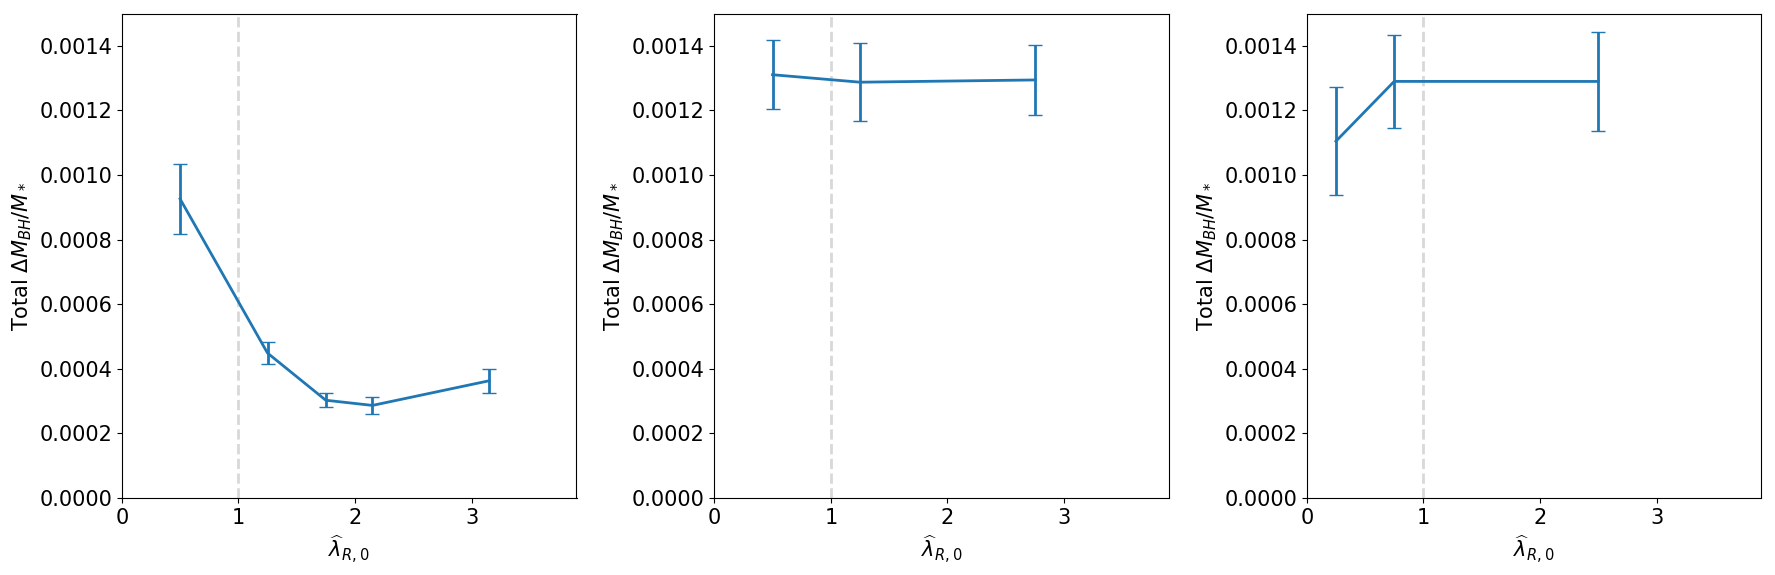

In [672]:
# fraction of ellipcials in filaments (blue) and clusters (red) at z=0 compared to delta bh over all time
fig = plt.figure(figsize=(18, 6));gs=gridspec.GridSpec(1, 3);
mass = [0,10,32,150]; label = ['Low Mass','Int. Mass', 'High Mass'];
bins = np.array([[0,1,1.5,2,2.3,4],
                 [0,1,1.5,4],
                 [0,0.5,1,4]]);

for j in [0,1,2]:
    ax = plt.subplot(gs[0,j], facecolor='white');
    data_z0 = allgalData[0];
    data_zn = bhdot_int_total
    # take all gals that are ellipticals at z=0 and have a certain mass
    mass_mask = maskMass_data(data_z0[:,2],mass[j],mass[j+1]);
    star_mask = (data_zn[:,0]!=0)
    data_zn = data_zn[(data_z0[:,14]<0.5) & mass_mask & star_mask]; 
    data_z0 = data_z0[(data_z0[:,14]<0.5) & mass_mask & star_mask];

    # bin all of them
    binned_data = bf.bin_data(data_z0[:,16], (data_zn[:,0]/data_z0[:,2]), bins[j])
    ax.errorbar(binned_data[:,6], binned_data[:,1], yerr=binned_data[:,3], fmt='-', capsize=5 , color='C0')
    
    #minor_ticks_x = np.arange(0, 4, 0.1); ax.set_xticks(minor_ticks_x, minor=True); ax.xaxis.set_tick_params(which='minor',width=1, length=3, direction='in');
    #ax.xaxis.set_tick_params(width=1, length=7, direction='in'); ax.yaxis.set_tick_params(width=1, length=7, direction='in');
    ax.set_xlabel(r'$\widehat{\lambda}_{R, 0}$'); ax.set_ylabel(r'Total $\Delta M_{BH}/{M_*}$');
    ax.set_xlim([0,3.9]); ax.set_ylim([0,0.0015])
    ax.axvline(1, color='grey', alpha=0.3, linestyle='--');
    #ax.text(3.8,0.3, label[j],fontsize=15, fontweight='bold', ha='right');
    #handles, labels = ax.get_legend_handles_labels(); handles = [h[0] for h in handles];ax.legend(handles,labels,loc="best");
    print(label[j], binned_data[:,5])

plt.tight_layout();

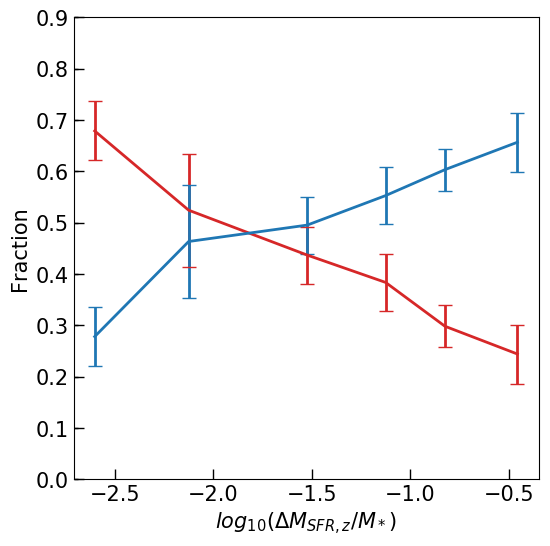

In [593]:
# fraction of ellipcials in filaments (blue) and clusters (red) at z=0 compared to sfr over 0.5Gyrs
bins = [0,0.005,0.01,0.05,0.1,0.2,.5]
fig = plt.figure(figsize=(6, 6));gs=gridspec.GridSpec(1, 1);
ax = plt.subplot(gs[0,0], facecolor='white');

red_i = 0
data     = webData_ellip[red_i][(galData_ellip[red_i][:,19] != 0)][:,17]
bin_data = stardot_int_zn[red_i][maskEllips(red_i) & (galData[red_i][:,19] != 0)][:,0]/galData_ellip[red_i][(galData_ellip[red_i][:,19] != 0)][:,2]

frac_data_clus = bf.bin_frac(data,bin_data,bins,1)
frac_data_fil = bf.bin_frac(data,bin_data,bins,0)
ax.errorbar(np.log10(frac_data_clus[:,0]), frac_data_clus[:,1], yerr=frac_data_clus[:,2], fmt='-', label='Bhdot', capsize=5 , color='C3')
ax.errorbar(np.log10(frac_data_fil[:,0]), frac_data_fil[:,1], yerr=frac_data_fil[:,2], fmt='-', label='Bhdot', capsize=5 , color='C0')

minor_ticks_y = np.arange(0, 1, 0.1); ax.set_yticks(minor_ticks_y, minor=True); ax.yaxis.set_tick_params(which='minor',width=1, length=3, direction='in');
ax.xaxis.set_tick_params(width=1, length=7, direction='in');ax.yaxis.set_tick_params(width=1, length=7, direction='in');
handles, labels = ax.get_legend_handles_labels(); handles = [h[0] for h in handles];
ax.set_xlabel(r'$log_{10}(\Delta M_{SFR, z} /{M_*})$'); ax.set_ylabel('Fraction');#ax.set_ylim([0, 1]);#ax1.set_xlim([0.01, 0.55]);


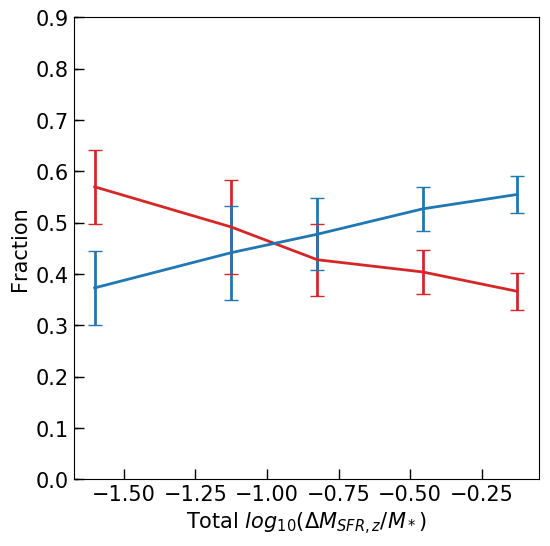

In [660]:
# fraction of ellipcials in filaments (blue) and clusters (red) at z=0 compared to sfr over all time
bins = [0,0.05,0.1,0.2,0.5,1]
fig = plt.figure(figsize=(6, 6));gs=gridspec.GridSpec(1, 1);
ax = plt.subplot(gs[0,0], facecolor='white');

red_i = 0
data     = webData_ellip[red_i][(galData_ellip[red_i][:,19] != 0)][:,17]
bin_data = stardot_int_total[maskEllips(red_i) & (galData[red_i][:,19] != 0)][:,0]/galData_ellip[red_i][(galData_ellip[red_i][:,19] != 0)][:,2]

frac_data_clus = bf.bin_frac(data,bin_data,bins,1)
frac_data_fil = bf.bin_frac(data,bin_data,bins,0)
ax.errorbar(np.log10(frac_data_clus[:,0]), frac_data_clus[:,1], yerr=frac_data_clus[:,2], fmt='-', label='Bhdot', capsize=5 , color='C3')
ax.errorbar(np.log10(frac_data_fil[:,0]), frac_data_fil[:,1], yerr=frac_data_fil[:,2], fmt='-', label='Bhdot', capsize=5 , color='C0')

minor_ticks_y = np.arange(0, 1, 0.1); ax.set_yticks(minor_ticks_y, minor=True); ax.yaxis.set_tick_params(which='minor',width=1, length=3, direction='in');
ax.xaxis.set_tick_params(width=1, length=7, direction='in');ax.yaxis.set_tick_params(width=1, length=7, direction='in');
handles, labels = ax.get_legend_handles_labels(); handles = [h[0] for h in handles];
ax.set_xlabel(r'Total $log_{10}(\Delta M_{SFR, z} /{M_*})$'); ax.set_ylabel('Fraction');#ax.set_ylim([0, 1]);#ax1.set_xlim([0.01, 0.55]);


In [6]:
data_size = allgalData_ellip[50].shape[0]
gal_tracer= np.zeros((51,data_size,6))

for ind in range (0,data_size):

    for i in range (50,-1,-1):
        next_index = tf.find_galaxy(allgalData,i,i-1,ind)
        if next_index != -1:
            gal_tracer[i,ind,0] = allgalData[i-1][next_index,16]
            gal_tracer[i,ind,1] = allgalData[i-1][next_index,19]
            gal_tracer[i,ind,2] = allgalData[i-1][next_index,20]
            gal_tracer[i,ind,3] = allgalData[i-1][next_index,14]
            gal_tracer[i,ind,4] = ind
            gal_tracer[i,ind,5] = next_index          

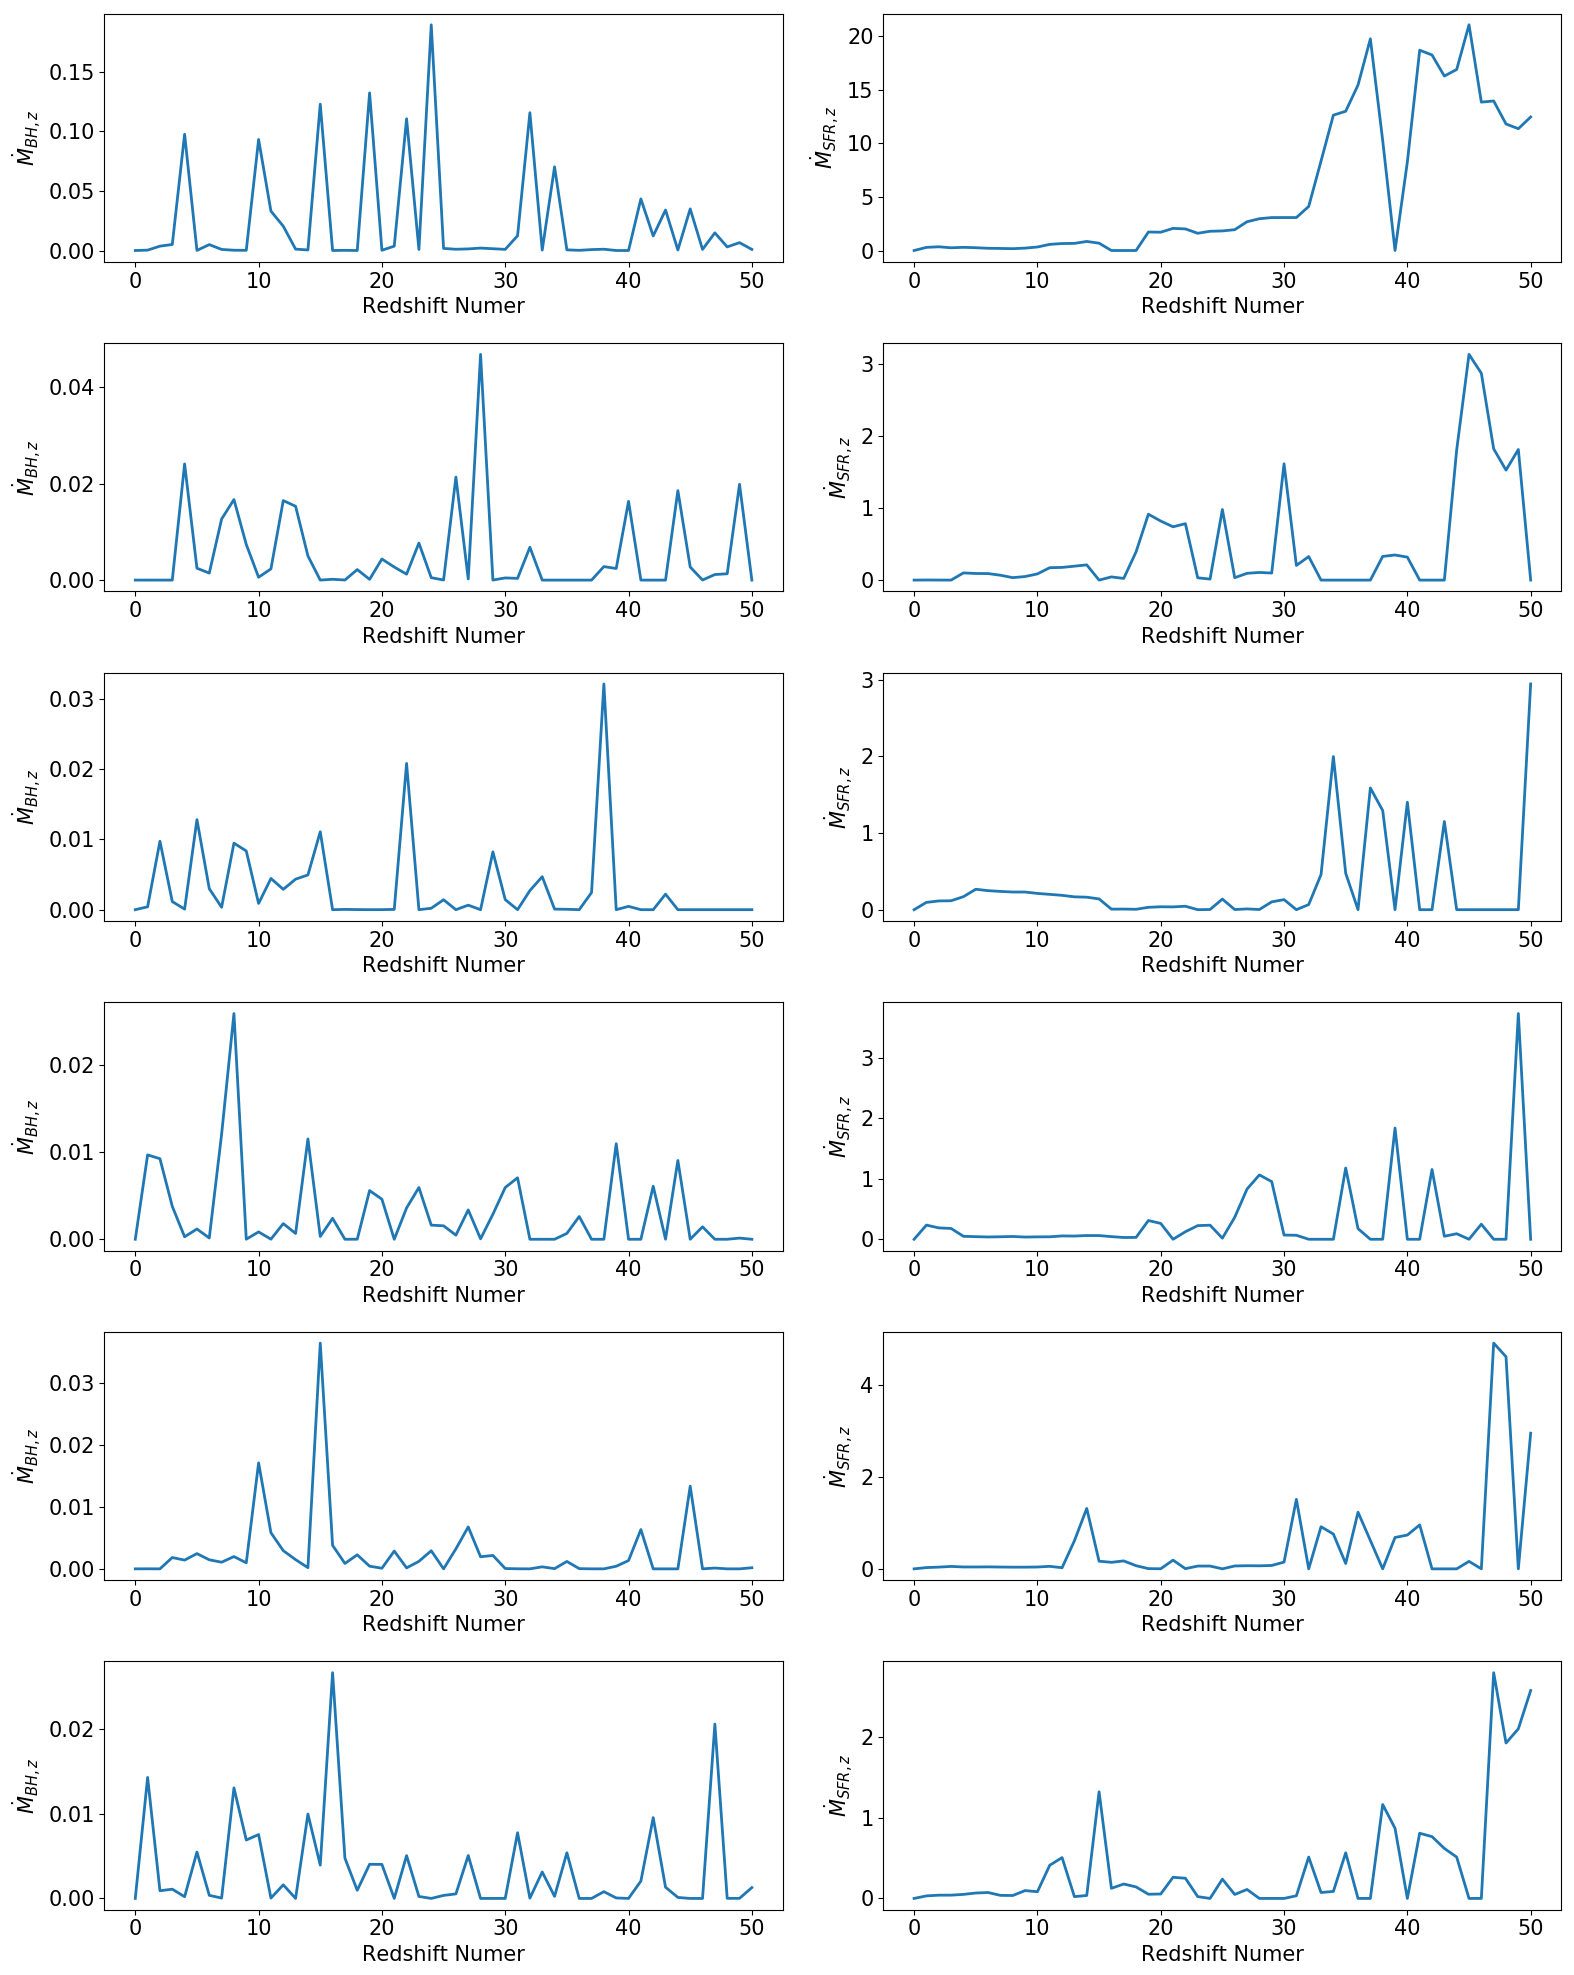

In [245]:
fig = plt.figure(figsize=(16, 20));
gal_ind = [0,1,2,3,4,5]
label =[r'$\dot{M}_{BH, z}$',r'$\dot{M}_{SFR, z}$' ]
gs=gridspec.GridSpec(6, 2)
for i in range (0,len(gal_ind)):
    for j in (0,1):
        ax = plt.subplot(gs[i,j], facecolor='white')
        ax.plot(gal_tracer[:,gal_ind[i],j+1])

        ax.set_xlabel('Redshift Numer'); ax.set_ylabel(label[j]);
        plt.tight_layout();

In [674]:
times = np.loadtxt('../../Data/time_conversion.txt')
times[:,2]

array([  0.054,   0.058,   0.062,   0.066,   0.071,   0.076,   0.082,
         0.087,   0.094,   0.1  ,   0.108,   0.116,   0.123,   0.132,
         0.142,   0.153,   0.163,   0.175,   0.188,   0.201,   0.215,
         0.231,   0.248,   0.266,   0.283,   0.304,   0.327,   0.351,
         0.376,   0.401,   0.431,   0.463,   0.486,   0.497,   0.529,
         0.56 ,   0.568,   0.61 ,   0.655,   0.703,   0.75 ,   0.782,
         0.805,   0.864,   0.927,   0.954,   0.989,   1.061,   1.139,
         1.205,   1.223,   1.312,   1.399,   1.577,   1.728,   1.855,
         1.99 ,   2.134,   2.195,   2.289,   2.438,   2.596,   2.745,
         2.902,   3.047,   3.198,   3.356,   3.522,   3.669,   3.823,
         3.983,   4.12 ,   4.291,   4.438,   4.59 ,   4.747,   4.908,
         5.074,   5.21 ,   5.384,   5.527,   5.674,   5.824,   5.977,
         6.015,   6.172,   6.292,   6.455,   6.622,   6.791,   6.921,
         7.096,   7.23 ,   7.411,   7.55 ,   7.737,   7.88 ,   8.024,
         8.171,   8.

In [ ]:
minor_ticks_x = np.arange(0, 0.7, 0.1); ax.set_xticks(minor_ticks_x, minor=True); ax.xaxis.set_tick_params(which='minor',width=1, length=3, direction='in');
ax.xaxis.set_tick_params(width=1, length=7, direction='in');
ax.yaxis.set_tick_params(width=1, length=7, direction='in');ax.set_yticks(minor_ticks_y, minor=True); ax.yaxis.set_tick_params(which='minor',width=1, length=3, direction='in');
        ax.set_xlabel(r'$\widehat{\lambda}_{R, 0}$');ax.set_ylim(-0.02,1.02);ax1.set_xlim([0,4]);
        ax.axvline(1, color='grey', alpha=0.3, linestyle='--');
        ax.text(0.7,0.95, label[j],fontsize=15, fontweight='bold', ha='right');
        print(label[j],'z=',i/2-0.5, clust_frac[:,3], fil_frac[:,3], void_frac[:,3])

ax.yaxis.set_tick_params(width=1, length=7, direction='in');ax.set_yticks(minor_ticks_y, minor=True); ax.yaxis.set_tick_params(which='minor',width=1, length=3, direction='in');
ax = plt.subplot(gs[0,0], facecolor='white'); ax.set_ylabel('Fraction in environment');
minor_ticks_y = np.arange(0, 1, 0.1); ax.set_yticks(minor_ticks_y, minor=True); ax.yaxis.set_tick_params(which='minor',width=1, length=3, direction='in');    
plt.tight_layout(); plt.subplots_adjust(hspace=0, wspace=.0); plt.show()